In [117]:
import h5py
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics 

from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, BatchNormalization, Activation, Dropout, Flatten, Reshape, Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping

In [3]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [67]:

#filename = '/content/drive/My Drive/AIML/SVHN_single_grey1.h5'
#filename = 'SVHN_single_grey1.h5'
#f = h5py.File(filename, 'r')

# List all groups
#print("Keys: %s" % f.keys())
#a_group_key = list(f.keys())[0]
#b_group_key = list(f.keys())[1]
#c_group_key = list(f.keys())[2]
#d_group_key = list(f.keys())[3]
#e_group_key = list(f.keys())[4]
#f_group_key = list(f.keys())[5]

# Get the data
#X_test = list(f[a_group_key])
#X_train = list(f[b_group_key])
#X_val = list(f[c_group_key])
#y_test = list(f[d_group_key])
#y_train = list(f[e_group_key])
#y_val = list(f[f_group_key])

In [68]:
#f.close()

In [70]:
# Import the dataset into Train, Test and Validation sets
#filename = '/content/drive/My Drive/AIML/SVHN_single_grey1.h5'
filename = 'SVHN_single_grey1.h5'
# Open the file as readonly
h5f = h5py.File(filename, 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

In [72]:
# Check the data in Train set
X_train[50]

array([[ 79.1708,  79.8718,  79.5729, ..., 125.9506, 140.0201, 146.2044],
       [ 73.2145,  73.0296,  71.7308, ..., 125.2927, 140.2481, 145.7314],
       [ 70.1439,  70.2579,  68.0732, ..., 124.9337, 140.775 , 145.8454],
       ...,
       [ 97.1412, 112.2537, 127.0072, ..., 117.3196, 134.5198, 139.5902],
       [ 96.9132, 108.439 , 119.9648, ..., 118.2055, 133.6339, 138.4763],
       [ 94.9134, 105.6242, 114.5632, ..., 118.2055, 133.5199, 138.4763]],
      dtype=float32)

In [73]:
# Check the output variable in Train dataset
y_train[50]

4

In [74]:
print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


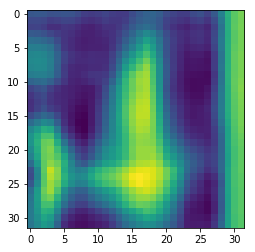

In [75]:
# Verify the data for the particular image we saw above
plt.imshow(X_train[50])

In [18]:
# # normalize inputs from 0-255 to 0-1
x_train = np.asarray(X_train) / 255.0
x_test = np.asarray(X_test) / 255.0
x_val = np.asarray(X_val) / 255.0

In [76]:
# Reshape the datasets to X,Y format
x_train=x_train.reshape(42000,1024)
x_test=x_test.reshape(18000,1024)
x_val=x_val.reshape(60000,1024)

In [0]:
# creating odd list of K for KNN
myList = [3,5,7,9]


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
print (cv_scores)
print (k_neighbors)

MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

[0.4291193413650524, 0.4617379155186992, 0.4715951148426814, 0.47966642626067896]
[3, 5, 7, 9]
The optimal number of neighbors is 9


In [0]:
# It took quite a few hours to run the cross validation but finally 
# it's identified that the best number of classifier is 9, hence executing the model with k = 9
knn = KNeighborsClassifier(n_neighbors = 9)


In [0]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [0]:
y_pred = knn.predict(x_test)

In [0]:
# Making the Confusion Matrix


print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.68      0.52      1814
           1       0.46      0.73      0.56      1828
           2       0.57      0.55      0.56      1803
           3       0.42      0.41      0.42      1719
           4       0.64      0.63      0.64      1812
           5       0.49      0.38      0.43      1768
           6       0.49      0.40      0.44      1832
           7       0.73      0.60      0.66      1808
           8       0.45      0.34      0.39      1812
           9       0.56      0.39      0.46      1804

    accuracy                           0.51     18000
   macro avg       0.52      0.51      0.51     18000
weighted avg       0.52      0.51      0.51     18000

[[1226   59   44   41   52   48  108   28   98  110]
 [  91 1336   69   88   85   41   22   47   20   29]
 [ 106  242  985  125   52   36   30  126   44   57]
 [ 130  271  150  711   56  155   46   57   83   60]
 [ 120  245   62   59 1145   

It's clear from the above classification report that the accuracy is 51% only

In [79]:
# convert class vectors to binary class matrices for keras
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)

In [81]:
# Convert the datatype to int from float for the output labels
y_train=y_train.astype(int)
y_test=y_test.astype(int)
y_val=y_val.astype(int)

Create a fully connected normal layer without Convolution and check the accuracy

In [88]:
#Initialize Sequential model
model1 = Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model1.add(Dense(48,input_shape=(1024,),activation='relu'))

#Normalize the data 
model1.add(BatchNormalization())

model1.add(Dense(600, activation='relu'))

model1.add(BatchNormalization())

model1.add(Dense(400, activation='relu'))

model1.add(BatchNormalization())

model1.add(Dense(200, activation='relu'))

model1.add(BatchNormalization())

model1.add(Dense(100, activation='relu'))

model1.add(BatchNormalization())

model1.add(Dense(80, activation='relu'))

model1.add(BatchNormalization())
#Add Dense Layer which provides 10 Outputs after applying softmax
model1.add(Dense(num_classes, activation='softmax'))

#Comile the model ((We will learn about optimizers it in the next residency))
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [90]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 48)                49200     
_________________________________________________________________
batch_normalization_27 (Batc (None, 48)                192       
_________________________________________________________________
dense_44 (Dense)             (None, 600)               29400     
_________________________________________________________________
batch_normalization_28 (Batc (None, 600)               2400      
_________________________________________________________________
dense_45 (Dense)             (None, 400)               240400    
_________________________________________________________________
batch_normalization_29 (Batc (None, 400)               1600      
_________________________________________________________________
dense_46 (Dense)             (None, 200)               80200     
__________

In [91]:
# Store Training Results
early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model1.fit(x_train, y_train, batch_size=5, nb_epoch=10, validation_data=(x_test, y_test), callbacks=callback_list)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 43s 1ms/step - loss: 2.3288 - acc: 0.1214 - val_loss: 2.2995 - val_acc: 0.1372
Epoch 2/10
42000/42000 [==============================] - 44s 1ms/step - loss: 2.2454 - acc: 0.1632 - val_loss: 2.0621 - val_acc: 0.2694
Epoch 3/10
42000/42000 [==============================] - 44s 1ms/step - loss: 2.1486 - acc: 0.2170 - val_loss: 2.0857 - val_acc: 0.2409
Epoch 4/10
42000/42000 [==============================] - 45s 1ms/step - loss: 2.1717 - acc: 0.2042 - val_loss: 1.9166 - val_acc: 0.3228
Epoch 5/10
42000/42000 [==============================] - 44s 1ms/step - loss: 2.1116 - acc: 0.2302 - val_loss: 1.8995 - val_acc: 0.3280
Epoch 6/10
42000/42000 [==============================] - 44s 1ms/step - loss: 2.1374 - acc: 0.2105 - val_loss: 2.4813 - val_acc: 0.1196
Epoch 7/10
42000/42000 [==============================] - 46s 1ms/step - loss: 2.1755 - acc: 0.1847 - val_loss: 2.3506 - val_acc

In [92]:
model1_loss,model1_accuracy=model1.evaluate(x_val,y_val)

60000/60000 [==============================] - 9s 150us/step


In [93]:
model1_loss

2.3084494642893474

In [94]:

model1_accuracy*100

10.006666666666666

In [95]:
y_pred_cn=model1.predict(x_val)

In [98]:

# Making the Classification Matrix
print(metrics.classification_report(y_val, np.round(y_pred_cn)))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6000
           1       0.00      0.00      0.00      6000
           2       0.00      0.00      0.00      6000
           3       0.00      0.00      0.00      6000
           4       0.00      0.00      0.00      6000
           5       0.00      0.00      0.00      6000
           6       0.00      0.00      0.00      6000
           7       0.64      0.00      0.00      6000
           8       0.00      0.00      0.00      6000
           9       0.00      0.00      0.00      6000

   micro avg       0.54      0.00      0.00     60000
   macro avg       0.06      0.00      0.00     60000
weighted avg       0.06      0.00      0.00     60000
 samples avg       0.00      0.00      0.00     60000



A standard neural network doesn't seem to resolve this problem. It has an accuracy of only 10% vs KNN where the accuracy was 51%. Classification repost also isn't encouraging

Let's now build the model with CNN

In [106]:
filename = 'SVHN_single_grey1.h5'
# Open the file as readonly
h5f = h5py.File(filename, 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

In [107]:
# # normalize inputs from 0-255 to 0-1
x_train = np.asarray(X_train) / 255.0
x_test = np.asarray(X_test) / 255.0
x_val = np.asarray(X_val) / 255.0

In [108]:
# Reshape the data to include the channel because channel is a prerequisite to CNN which is not available to us in the given dataset
x_train=x_train.reshape(42000,32, 32, 1)
x_test=x_test.reshape(18000,32, 32, 1)
x_val=x_val.reshape(60000,32,32,1)

In [109]:
# convert class vectors to binary class matrices for keras
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)

In [52]:
model = Sequential()
# 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 1)))
model.add(Activation('relu'))

# 2nd Conv Layer
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

# Prediction Layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Store Training Results
early_stopping = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model.fit(x_train, y_train, batch_size=32, nb_epoch=10, validation_data=(x_test, y_test), callbacks=callback_list)

C:\Users\024059\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\024059\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys
C:\Users\024059\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 169s 4ms/step - loss: 2.1896 - acc: 0.2154 - val_loss: 1.8185 - val_acc: 0.3779
Epoch 2/10
42000/42000 [==============================] - 131s 3ms/step - loss: 1.3777 - acc: 0.5634 - val_loss: 1.4779 - val_acc: 0.5656
Epoch 3/10
42000/42000 [==============================] - 131s 3ms/step - loss: 1.1030 - acc: 0.6645 - val_loss: 1.0012 - val_acc: 0.6980
Epoch 4/10
42000/42000 [==============================] - 130s 3ms/step - loss: 0.9255 - acc: 0.7246 - val_loss: 0.9193 - val_acc: 0.7283
Epoch 5/10
42000/42000 [==============================] - 130s 3ms/step - loss: 0.7697 - acc: 0.7718 - val_loss: 0.7740 - val_acc: 0.7727
Epoch 6/10
42000/42000 [==============================] - 130s 3ms/step - loss: 0.6475 - acc: 0.8087 - val_loss: 0.7357 - val_acc: 0.7840
Epoch 7/10
42000/42000 [==============================] - 130s 3ms/step - loss: 0.5553 - acc: 0.8377 - val_loss: 0.6149 - 

In [112]:
model_loss,model_accuracy=model.evaluate(x_val,y_val)

60000/60000 [==============================] - 41s 683us/step


In [113]:
model_loss

0.3928935322254896

In [114]:
model_accuracy*100

88.95166666666667

In [111]:
y_pred_cn=model.predict(x_val)

In [60]:
y_pred_cn[10]

array([7.9937615e-02, 1.0791415e-05, 1.2300372e-03, 1.0574368e-02,
       7.2749062e-05, 1.6567672e-02, 2.3606102e-01, 2.8600539e-06,
       5.3502172e-01, 1.2052115e-01], dtype=float32)

In [59]:
np.round(y_pred_cn[10])

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [115]:
# Making the Classification Matrix


print(metrics.classification_report(y_val, np.round(y_pred_cn)))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      6000
           1       0.92      0.87      0.89      6000
           2       0.97      0.86      0.91      6000
           3       0.94      0.80      0.86      6000
           4       0.97      0.86      0.91      6000
           5       0.92      0.86      0.89      6000
           6       0.91      0.86      0.89      6000
           7       0.95      0.90      0.92      6000
           8       0.97      0.72      0.83      6000
           9       0.88      0.89      0.89      6000

   micro avg       0.93      0.85      0.89     60000
   macro avg       0.94      0.85      0.89     60000
weighted avg       0.94      0.85      0.89     60000
 samples avg       0.85      0.85      0.85     60000



Looking at the CNN model, we can clearly establish that this is the best among KNN, Traditional NN and CNN based on the following factors:
    1. Accuracy is 89%
    2. Loss is low
    3. Good f1-score
    4. Good precision and recall